# SVM (Support Vector Machine)

SVM은 딥러닝 이전 뛰어난 성능으로 많은 주목을 받았던 모델로써 분류, 회귀 모두에서 활용가능하다. 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지에 대해 비확률적 이진 선형 분류 모델을 만든다.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, NuSVC, LinearSVC, SVR

%matplotlib inline

----

**TIP)**    
*Margin*    

참고자료: https://ratsgo.github.io/machine%20learning/2017/05/23/SVM/

아래 그림에서 $B_{1}$은 $B_{2}$보다 두 범주를 여유롭게 가르고 있으며, 이때 $b_{11}$을 plus-plane, $b_{12}$를 minus-plane이라고 하며 $b_{11}$과 $b_{12}$ 사이의 거리를 margin이라고 한다. SVM은 이 margin을 최대화 하는 분류 경계면을 찾는 기법이다.

<img src='./image/Margin.png'>

찾아야 하는 경계면을 $w^{T}x + b = 0$이라고 할때 $w$는 경계면과 수직인 법선벡터가 되며 plus-plane은 $w^{T}x + b = 1$, minus-plane은 $w^{T}x + b = -1$이 된다.    
    
plus-plane 위에 있는 벡터$x^{+}$는 $x^{-}$와 $x^{+} = x^{-} + \lambda w$과 같은 관계를 가진다. 위 관계를 통해 $\lambda$를 구하면 다음과 같다.    
> $w^{T}x^{+} + b = 1$    
$w^{T}(x^{-} + \lambda w) + b = 1$    
$W^{T}x^{-} + b + \lambda w^{T}w = 1$    
$-1 + \lambda w^{T}w = 1$    
$\lambda = \frac{2}{w^{T}w}$    
    
$\lambda$를 구했으므로 margin을 $w$로 정리할 수가 있다.    
>$Margin = distance(x^{+}, x^{-})$    
&nbsp;    $= \parallel x^{+} - x^{-}  \parallel_{2}$    
&nbsp;    $= \parallel x^{-} + \lambda w - x^{-}  \parallel_{2}$   
&nbsp;    $= \parallel \lambda w  \parallel_{2}$   
&nbsp;    $= \lambda \sqrt{w^{T}w}$   
&nbsp;    $= \frac{2}{w^{T}w} \sqrt{w^{T}w}$   
&nbsp;    $= \frac{2}{\sqrt{w^{T}w}}$    
&nbsp;    $= \frac{2}{\parallel w \parallel_{2}}$    

SVM의 목적은 margin을 최대화 하는 경계면을 찾는 것이므로 $max (\frac{2}{\parallel w \parallel_{2}})$의 문제를 푸는것으로 귀결된다. 계산의 편의를 위해 margin의 절반을 제곱한 것에 역수를 취한 뒤 그 절반을 최소화 하는 문제로 바꾼 뒤에 계산한다. (문제의 본질은 동일하다) 이때, plus-plane보다 위에 있는 관측치들은 $y=1$이고 $w^{T}x + b$가 1보다 크다. 반대로 minus-plane보다 아래에 있는 관측치들은 $y=-1$이고 $w^{T}x + b$가 -1보다 작다. 이 두 조건으로 인해 제약조건은 다음과 같다.      
> $max (\frac{2}{\parallel w \parallel_{2}}$) -> $min (\frac{\parallel w \parallel_{2}^{2}}{2}$)    

> 제약식:  $y_{i}(w^{T}x_{i}+b) \geq 1$    

라그랑지안 승수법(Lagrange multiple method)은 제약식에 형식적인 라그랑지안 승수를 곱항 항을 최적화 하려는 목적식에 더하여, 제약된 문제를 제약이 없는 문제로 바꾸는 기법이다. 이 라그랑지안 승수법을 이용하여 정의된 목적식과 제약식을 라그랑지안 문제로 식을 다시 쓰면 다음과 같다. 이때, 원래 제약식의 범위가 0 이상이므로 $L_{p}$의 제약은 아래와 같다.      
> $min(L_{p}(w, b, \alpha_{i})) = \frac{2}{\parallel w \parallel_{2}} - \sum^{n}_{i=1}\alpha_{i}(y_{i}(w^{T}x_{i}+b) - 1)$    

> 제약식: $\alpha_{i} \geq 0, (i=1, 2, ..., n$)

$L_{p}$를 미지수로 각각 편미분한 식이 0이 되는 지점에서 최소값을 가지므로 아래의 문제를 풀면된다.   
> $\frac{\partial L(w, b, \alpha_{i})}{\partial w} = 0$  ->  $w = \sum^{n}_{i=1}\alpha_{i} y_{i} x_{i}$ 
    
> $\frac{\partial L(w, b, \alpha_{i})}{\partial b} = 0$  ->  $\sum^{n}_{i=1}\alpha_{i} y_{i} = 0$

첫번째 항인 $\frac{2}{\parallel w \parallel_{2}}$을 정리하면 다음과 같다.   
> $\frac{2}{\parallel w \parallel_{2}}$ = $\frac{1}{2}w^{T}w$   
&nbsp;&nbsp;&nbsp;  = $\frac{1}{2}w^{T}\sum^{n}_{j=1}\alpha_{j}y_{j}x_{j}$    
&nbsp;&nbsp;&nbsp;  = $\frac{1}{2}\sum^{n}_{j=1}\alpha_{j}y_{j}(w^{T}x_{j})$    
&nbsp;&nbsp;&nbsp;  = $\frac{1}{2}\sum^{n}_{j=1}\alpha_{j}y_{j}(\sum^{n}_{i=1}\alpha_{i}y_{i}x^{T}_{i}x_{j})$   
&nbsp;&nbsp;&nbsp;  = $\frac{1}
{2}\sum^{n}_{i=1}\sum^{n}_{j=1}\alpha_{i}\alpha_{j}y_{i}y_{j}x^{T}_{i}x_{j}$   

두번째 항인 $- \sum^{n}_{i=1}\alpha_{i}(y_{i}(w^{T}x_{i}+b) - 1)$을 정리하면 다음과 같다.   
> $- \sum^{n}_{i=1}\alpha_{i}(y_{i}(w^{T}x_{i}+b) - 1)$ = $-\sum^{n}_{i=1}\alpha_{i}y_{i}(w^{T}x_{i} + b) + \sum^{n}_{i=1}\alpha_{i}$    
&nbsp;&nbsp;             = $-\sum^{n}_{i=1}\alpha_{i}y_{i}w^{T}x_{i} - b\sum^{n}_{i=1}\alpha_{i}y_{i} + \sum^{n}_{i=1}\alpha_{i}$    
&nbsp;&nbsp;             = $-\sum^{n}_{i=1}\sum^{n}_{j=1}\alpha_{i}\alpha_{j}y_{i}y_{j}x^{T}_{i}x_{j} + \sum^{n}_{i=1}\alpha_{i}$

첫번째 항과 두번쨰 항의 정리 결과를 토대로 $L_{p}$를 정리하면 되는데, 식을 변형 하는 과정에서 $\alpha$의 최고차항의 계수가 음수이므로 최소값을 찾는 문제가 최대값을 찾는 문제로 바뀌었고 변형된 $L_{D}$는 다음과 같다. 이떄, $L_{D}$의 제약식은 아래와 같다.    
> $max(L_{D}(\alpha_{i})) = \sum^{n}_{i=1}\alpha_{i} - \frac{1}{2}\sum^{n}_{i=1}\sum^{n}_{j=1}\alpha_{i}\alpha_{j}y_{i}y_{j}x^{T}_{i}x_{j}$    

> 제약식: $\sum^{n}_{i=1}\alpha_{i}y_{i} = 0, (\alpha_{i} \geq 0,  i = 1, 2, ..., n$)

찾고자 하는 최대된 분류경계면은 $w^{T}x + b$이므로 $w$와 $b$를 알면 SVM의 해를 구할 수 있다. $w = \sum^{n}_{i=1}\alpha_{i} y_{i} x_{i}$이고 $x_{i}$와 $y_{i}$는 우리가 가지고 있는 학습 데이터이므로 $\alpha$의 값들만 알면 $w$를 찾을 수 있다. 그런데 여기서 $\alpha_{i}$가 0인 관측치들은 분류경계면 형성에 아무런 영향을 끼치지 못한다. 다시 말해, $i$번째 관측치에 대응하는 라그랑지안 승수 $\alpha_{i}$가 0보다 커야 margin결정에 유의미 하다는 이야기이다.    
아울러 KKT(Karush-Kuhn-Tucker) 조건에서 함수가 최적값을 갖는다면, $\alpha_{i}$ 또는 $y_{i}(w^{T}x_{i} + b) - 1$ 두 개 가운데 하나는 반드시 0이므로 $\alpha_{i}$가 0이 아니라면 $y_{i}(w^{T}x_{i} + b) - 1$는 반드시 0이 되어야 한다. 따라서 $x_{i}$는 plus-plane, minus-plane 위에 있는 벡터가 된다.    

<img src='./image/support_vectors.png' width=400 height=400>

이렇게 margin의 결정에 영향을 끼치는 관측치들을 support vectors라고 한다.    
한편, $b$는 이미 구한 $w$와 학습데이터 $y_{i}(w^{T}x_{i} + b - 1) = 0$ 식을 활용하여 바로 구할 수가 있다. 새로운 데이터가 들어왔을 때, 해당 관측치를 $y_{i}(w^{T}x_{i} + b - 1)$에 넣어서 0보다 크면 1, 0보다 작으면 -1 범주로 예측하면 된다.

----

<br>   
임의의 데이터셋을 통해 margin을 시각화 하면 아래와 같다.

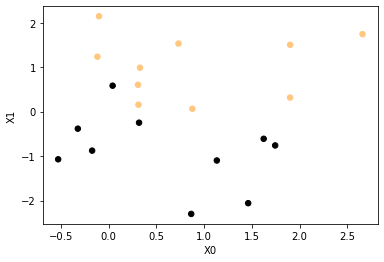

In [30]:
# 임의의 Data Sets 생성
np.random.seed(1)
X = np.random.randn(20, 2)
y = np.repeat([-1, 1], 10)
X[y==1] = X[y==1]  + 1
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap='copper')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()